In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
#as rename 
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Be-Cenzo/SpaceAI/main/Dataset/"
FILE_PATH = os.path.join("Dataset")
FILE_URL1 = DOWNLOAD_ROOT + "star_classification.csv"

#download del dataset
def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "star_classification.csv")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

In [3]:
#lettura del dataset
datapath = os.path.join("Dataset", "")

stars = pd.read_csv(datapath + "star_classification.csv")

In [6]:
#distribuzione dei dati
print(stars.describe())

             obj_ID         alpha         delta             u             g  \
count  9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean   1.237665e+18    177.628653     24.135552     22.080679     20.631583   
std    8.438450e+12     96.502612     19.644608      2.251068      2.037384   
min    1.237646e+18      0.005528    -18.785328     10.996230     10.498200   
25%    1.237659e+18    127.517698      5.147477     20.352410     18.965240   
50%    1.237663e+18    180.900527     23.646462     22.179140     21.099930   
75%    1.237668e+18    233.895005     39.901582     23.687480     22.123775   
max    1.237681e+18    359.999810     83.000519     32.781390     31.602240   

                  r             i             z        run_ID  rerun_ID  \
count  99999.000000  99999.000000  99999.000000  99999.000000   99999.0   
mean      19.645777     19.084865     18.768988   4481.403354     301.0   
std        1.854763      1.757900      1.765982   1964.739021  

In [5]:
#ricerca di dati mancanti
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

vuoto = stars.isnull();
print(stars.isnull().sum())
print(vuoto[vuoto["z"] == 1])

missing_values = ["n/a", "na", "--", "nan", "NaN", -9999]
stars = pd.read_csv(datapath + "star_classification.csv", na_values = missing_values)
print(missing_values)

#data quality imputation
#eliminazione righe con dati mancanti
stars = stars.dropna(axis=0)
print(stars.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64
Empty DataFrame
Columns: [obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, field_ID, spec_obj_ID, class, redshift, plate, MJD, fiber_ID]
Index: []
['n/a', 'na', '--', 'nan', 'NaN', -9999]
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [ ]:
#scatterplot -> definition

stars.plot(x='redshift', y='class',kind='scatter')
plt.show()

In [7]:
#definizione delle variabili indipendenti e della variabile target

X = stars.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 10 ,11, 12, 14, 15, 16, 17]]
y= stars.iloc[ : , 13]

GALAXY    59445
STAR      21593
QSO       18961
Name: class, dtype: int64

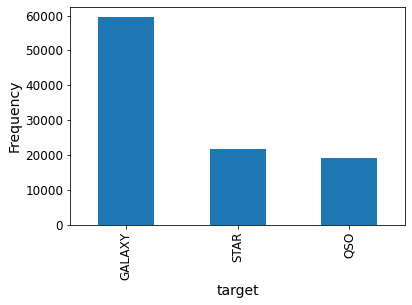

In [10]:
#plot della distribuzione della variabile target
pd.value_counts(stars['class']).plot.bar()
plt.xlabel('target')
plt.ylabel('Frequency')
stars['class'].value_counts()

In [11]:
from sklearn.model_selection import train_test_split

#divisione del dataset in training set e testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
X_train_res = X_train
y_train_res = y_train

Number transactions X_train dataset:  (79999, 15)
Number transactions y_train dataset:  (79999,)
Number transactions X_test dataset:  (20000, 15)
Number transactions y_test dataset:  (20000,)


In [ ]:
#Oversampling utilizzando SMOTE
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label 'GALAXY': {}".format(sum(y_train == "GALAXY")))
print("Before OverSampling, counts of label 'QSO': {}".format(sum(y_train == "QSO")))
print("Before OverSampling, counts of label 'STAR': {} \n".format(sum(y_train == "STAR")))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
#Undersampling utilizzando RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

print("Before UnderSampling, counts of label 'GALAXY': {}".format(sum(y_train == "GALAXY")))
print("Before UnderSampling, counts of label 'QSO': {}".format(sum(y_train == "QSO")))
print("Before UnderSampling, counts of label 'STAR': {} \n".format(sum(y_train == "STAR")))

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [ ]:
#Undersampling utilizzando ClusterCentroids
from imblearn.under_sampling import ClusterCentroids

print("Before UnderSampling, counts of label 'GALAXY': {}".format(sum(y_train == "GALAXY")))
print("Before UnderSampling, counts of label 'QSO': {}".format(sum(y_train == "QSO")))
print("Before UnderSampling, counts of label 'STAR': {} \n".format(sum(y_train == "STAR")))

cc = ClusterCentroids(random_state=42)
X_train_res, y_train_res = cc.fit_resample(X_train, y_train)

In [12]:
#Undersampling utilizzando NearMiss
from imblearn.under_sampling import NearMiss

print("Before UnderSampling, counts of label 'GALAXY': {}".format(sum(y_train == "GALAXY")))
print("Before UnderSampling, counts of label 'QSO': {}".format(sum(y_train == "QSO")))
print("Before UnderSampling, counts of label 'STAR': {} \n".format(sum(y_train == "STAR")))

nm = NearMiss()
X_train_res, y_train_res = nm.fit_resample(X_train, y_train)

Before UnderSampling, counts of label 'GALAXY': 47541
Before UnderSampling, counts of label 'QSO': 15151
Before UnderSampling, counts of label 'STAR': 17307 



In [13]:
print("After Balancing, counts of label 'GALAXY': {}".format(sum(y_train_res == "GALAXY")))
print("After Balancing, counts of label 'QSO': {}".format(sum(y_train_res ==  "QSO")))
print("After Balancing, counts of label 'STAR': {}".format(sum(y_train_res ==  "STAR")))

After Balancing, counts of label 'GALAXY': 15151
After Balancing, counts of label 'QSO': 15151
After Balancing, counts of label 'STAR': 15151


26002       QSO
80421      STAR
19864      STAR
81526      STAR
57878    GALAXY
Name: class, dtype: object
            alpha      delta         u         g         r         i  \
26002  118.663236  39.642429  22.85773  22.18874  21.35562  21.26577   
80421  358.991830  32.749086  22.62560  22.02104  22.06787  22.44037   
19864   30.887222   1.188710  18.18911  16.89469  16.42161  16.24627   
81526  118.272263  66.181027  17.57887  16.55078  16.21527  16.10371   
57878   22.848077  -4.611963  27.10401  22.65568  21.26362  20.04805   

              z  run_ID  cam_col  field_ID   spec_obj_ID  redshift  plate  \
26002  20.93935    2076        6       100  1.053522e+19  1.174289   9357   
80421  22.17338    4135        3       252  8.727075e+18 -0.001960   7751   
19864  16.18549    7717        1       536  8.255357e+18  0.000004   7332   
81526  16.09738    4887        4       256  3.309184e+18 -0.000165   2939   
57878  19.61308    7881        4       174  7.934490e+18  0.523852   7047  

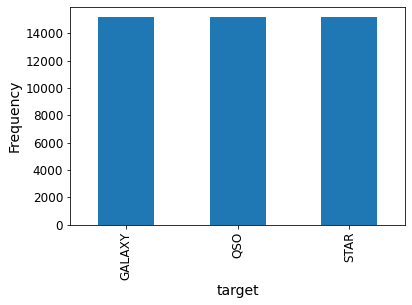

In [14]:
#plot della distribuzione della variabile target dopo il bilanciamento
pd.value_counts(y_train_res).plot.bar()
plt.xlabel('target')
plt.ylabel('Frequency')
y_train_res.value_counts()
print(y_test.head(5))
print(X_test.head(5))

In [ ]:
#Normalizzazione dei dati
from sklearn.preprocessing import MinMaxScaler

scl = MinMaxScaler(feature_range=(0, 1)) #you can use differnt range
X_train_res = scl.fit_transform(X_train_res)
x_test = scl.fit_transform(X_test)

print(X_train_res)

In [18]:
#feature selection usando SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, mutual_info_classif
from numpy import set_printoptions

fs = SelectKBest(score_func=mutual_info_classif,k=10)
fs.fit_transform(X_train_res, y_train_res)
#print(fs[:7])

X_new_train_res = fs.transform(X_train_res)
X_new_test = fs.transform(X_test)
print(X_new_train_res.shape)


X.columns[fs.get_support(indices=True)]

X.columns[fs.get_support(indices=True)].tolist()

#print(X_new_test[1])

(45453, 10)


['u', 'g', 'r', 'i', 'z', 'run_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD']

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
#The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

tree_model.fit(X_new_train_res, y_train_res)

y_pred = tree_model.predict(X_new_test)

labels = np.unique(y_test)
print(confusion_matrix(y_test, y_pred, labels=labels))
print(classification_report(y_test, y_pred))

#Overall, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11440   364   100]
 [  676  3134     0]
 [    0     0  4286]]
              precision    recall  f1-score   support

      GALAXY       0.94      0.96      0.95     11904
         QSO       0.90      0.82      0.86      3810
        STAR       0.98      1.00      0.99      4286

    accuracy                           0.94     20000
   macro avg       0.94      0.93      0.93     20000
weighted avg       0.94      0.94      0.94     20000

Accuracy: 0.943


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


nb = MultinomialNB()
nb.fit(X_train_res, y_train_res)

y_pred = nb.predict(X_test)

labels = np.unique(y_test)
print(confusion_matrix(y_test, y_pred, labels=labels))
print(classification_report(y_test, y_pred))

#Overall, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

#stampa della matrice di confusione
labels = np.unique(y_test)
a =  confusion_matrix(y_test, y_pred, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)

In [25]:
#Demo

u = input("Inserisci u: ")
g = input("Inserisci g: ")
r = input("Inserisci r: ")
i = input("Inserisci i: ")
z = input("Inserisci z: ")
runid = input("Inserisci run_ID: ")
specobjid = input("Inserisci spec_obj_ID: ")
redshift = input("Inserisci redshift: ")
plate = input("Inserisci plate_ID: ")
MJD = input("Inserisci MJD: ")


sample = np.array([u, g, r, i, z, runid, specobjid, redshift, plate, MJD])

#quasar = np.array([22.85773, 22.18874, 21.35562, 21.26577, 20.93935, 2076, 1.053522e+19, 1.174289, 9357, 57807])
#galaxy = np.array([27.10401, 22.65568, 21.26362, 20.04805, 19.61308, 7881, 7.934490e+18, 0.523852, 7047, 56572])
#star = np.array([22.62560, 22.02104, 22.06787, 22.44037, 22.17338, 4135, 8.727075e+18, -0.001960, 7751, 58081])
#sample = galaxy 

sample = sample.reshape(1, -1)
y_pred = tree_model.predict(sample)
print(y_pred)

['GALAXY']
